# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [1]:
from t2_constants import *
from t2_utility import *

In [2]:
with open(f'{PICKLE_FOLDER}{CLUST_DF}.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{CLUST_DF}.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [3]:
clustering_df_array, clustering_df = scale_df(clustering_df, 1)
pure_clustering_df_array, pure_clustering_df = scale_df(pure_clustering_df, 1)

In [4]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

## X-Means

In [5]:
xmeans_instance = xmeans_run(clustering_df_array, 2, 10)
pure_xmeans_instance = xmeans_run(pure_clustering_df_array, 2, 10)

In [6]:
def xmeans_results(instance, array, scores_df, algorithm_name):
    clusters = instance.get_clusters()
    centers = instance.get_centers()

    scores_df.loc[algorithm_name, 'SSE'] = instance.get_total_wce()
    labels = np.zeros(array.shape[0])
    for i, cluster in enumerate(clusters):
        for c in cluster:
            labels[c] = i
    scores_df.loc[algorithm_name, 'silhouette'] = silhouette_score(array, labels)

    return clusters, centers, labels

In [7]:
cl, cn, lab = xmeans_results(xmeans_instance, clustering_df_array, clustering_scores_df, 'xmeans')
pcl, pcn, plab = xmeans_results(pure_xmeans_instance, pure_clustering_df_array, clustering_scores_df, 'pure_xmeans')

In [8]:
clustering_scores_df

,silhouette,SSE
xmeans,0.143279,4660.783331
pure_xmeans,0.203824,3198.782449


In [9]:
u_df[LAB] = lab.astype(int)
u_df.groupby(LAB)[LAB].count()

label
0    260
1    174
2     11
3    178
4    148
5     12
Name: label, dtype: int64

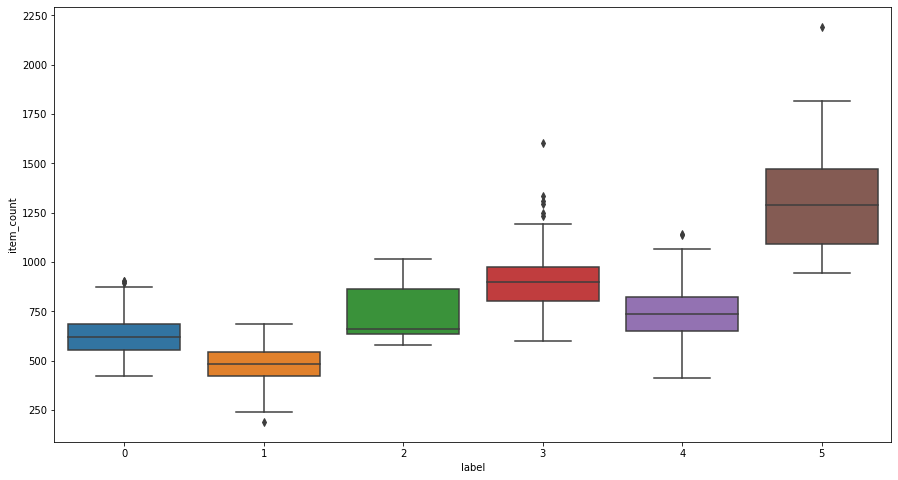

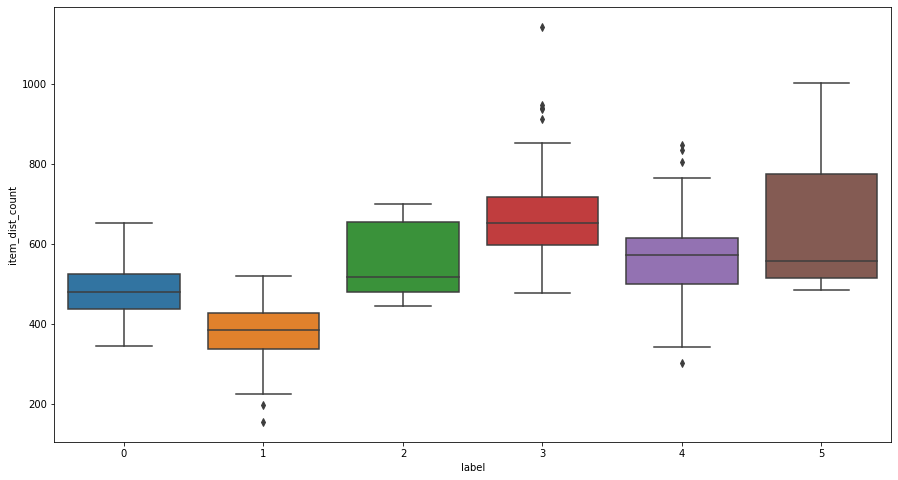

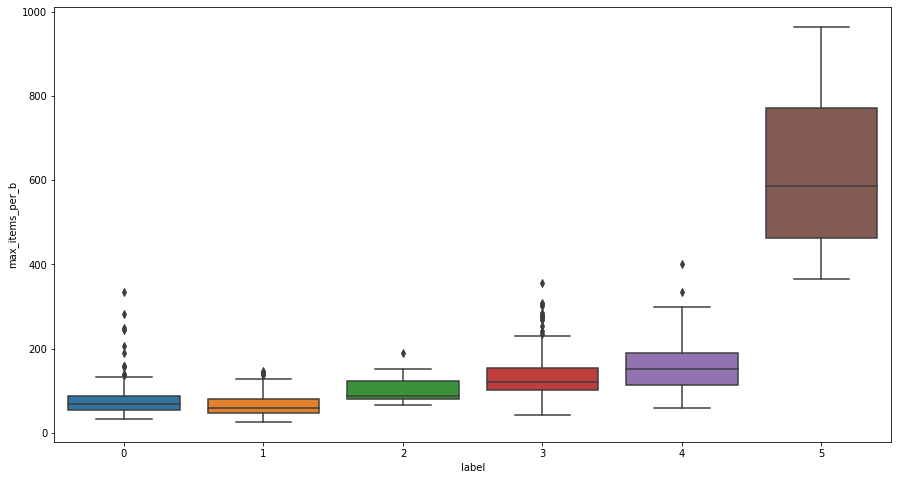

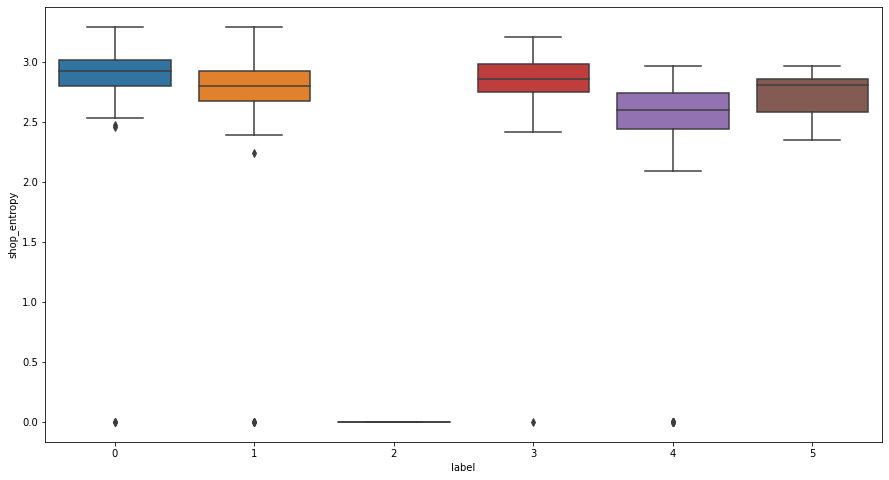

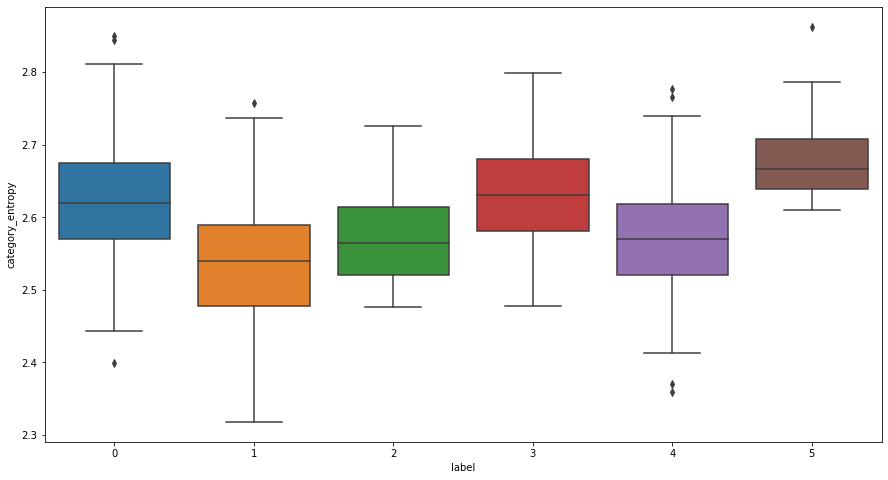

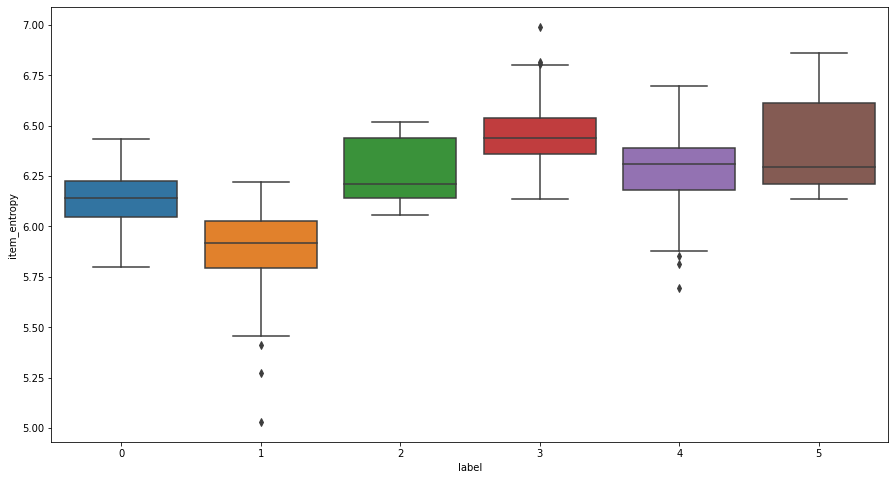

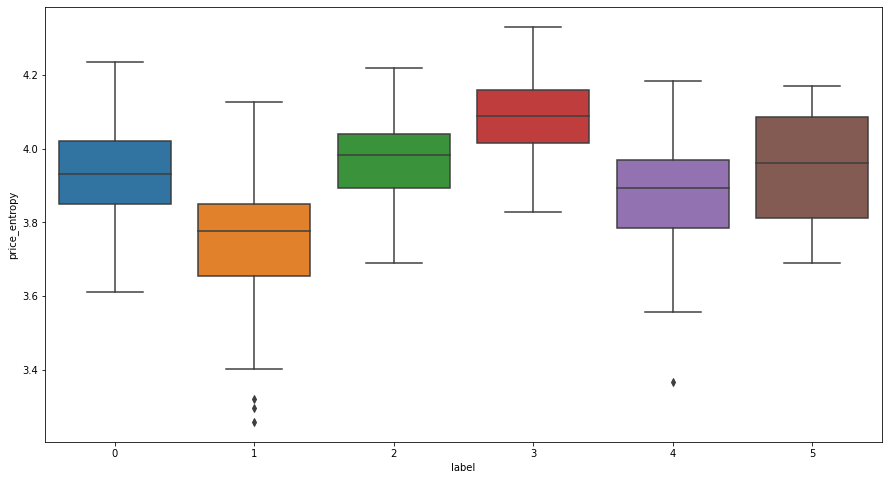

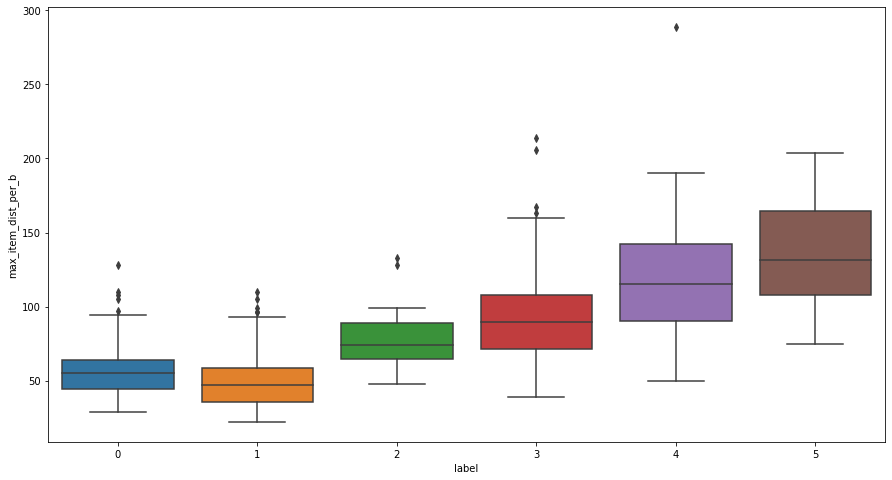

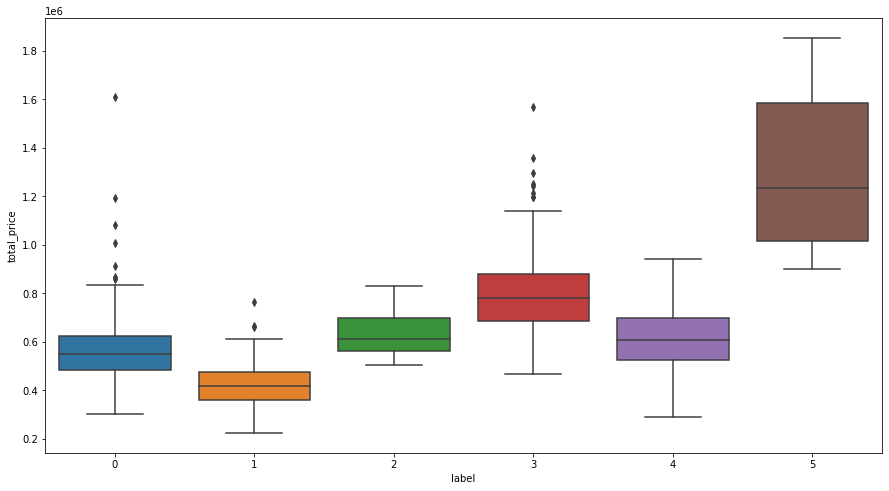

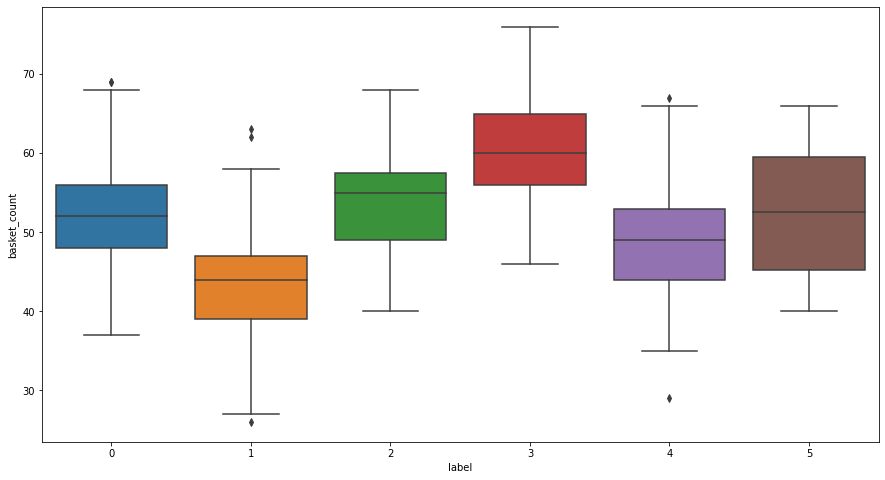

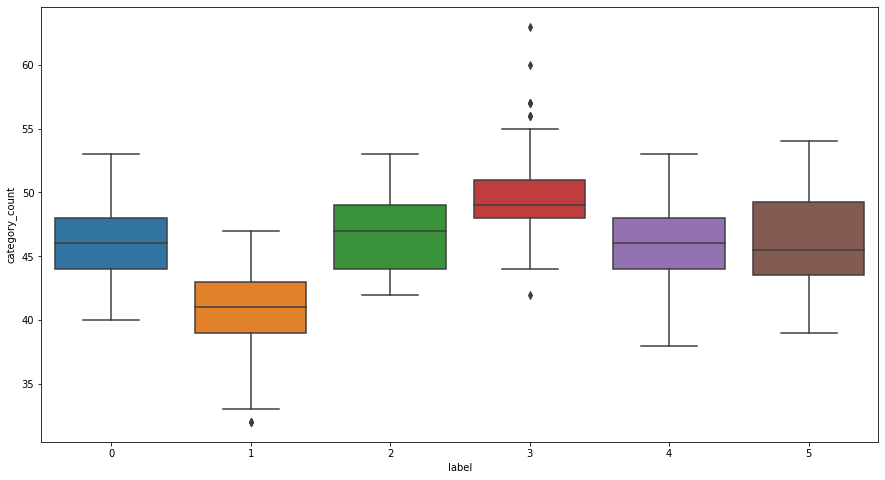

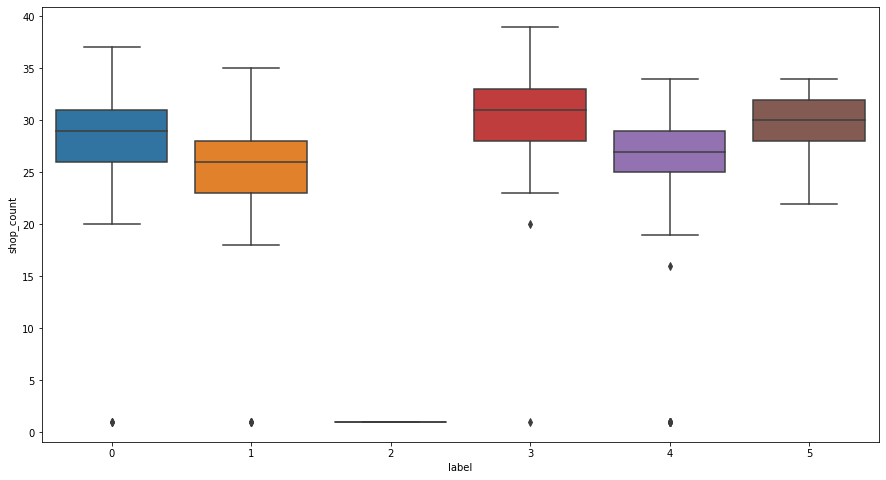

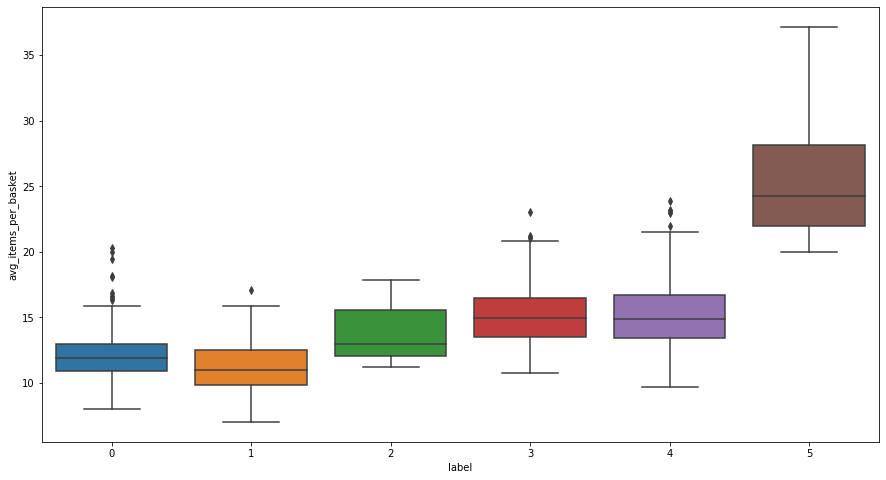

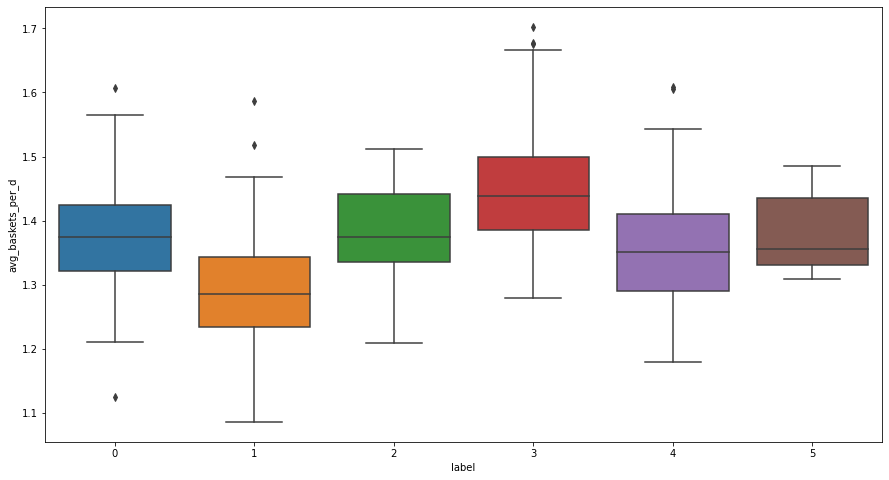

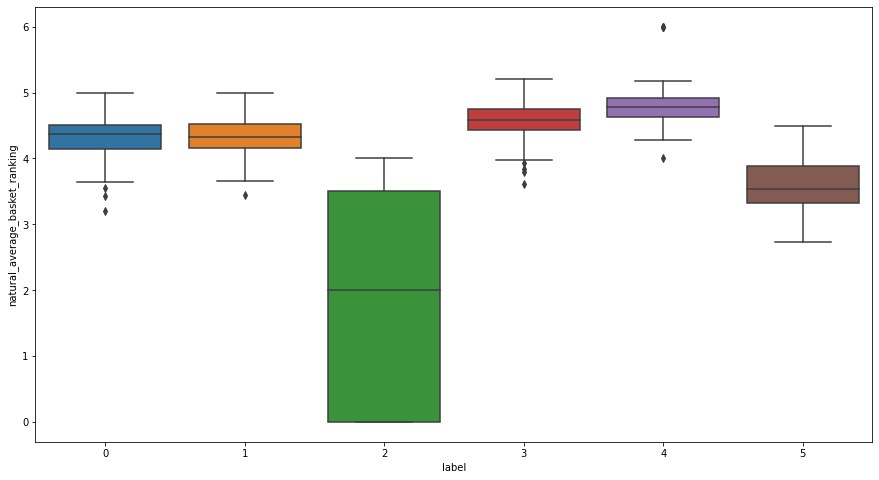

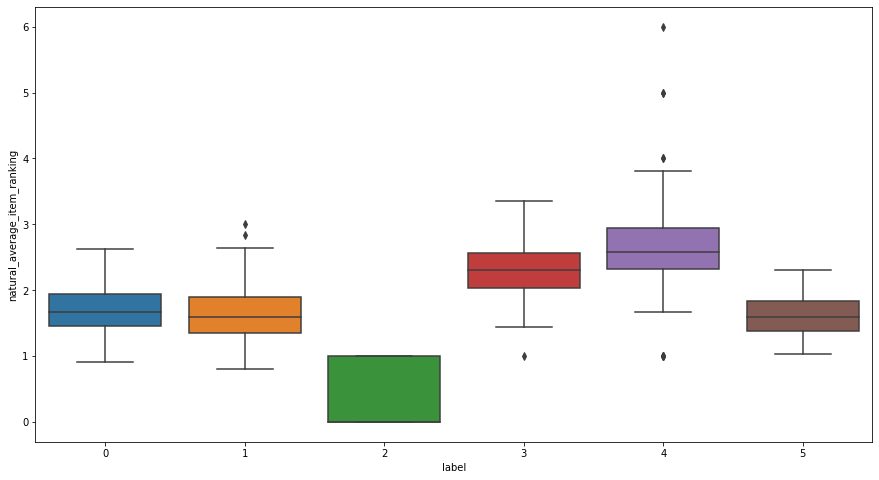

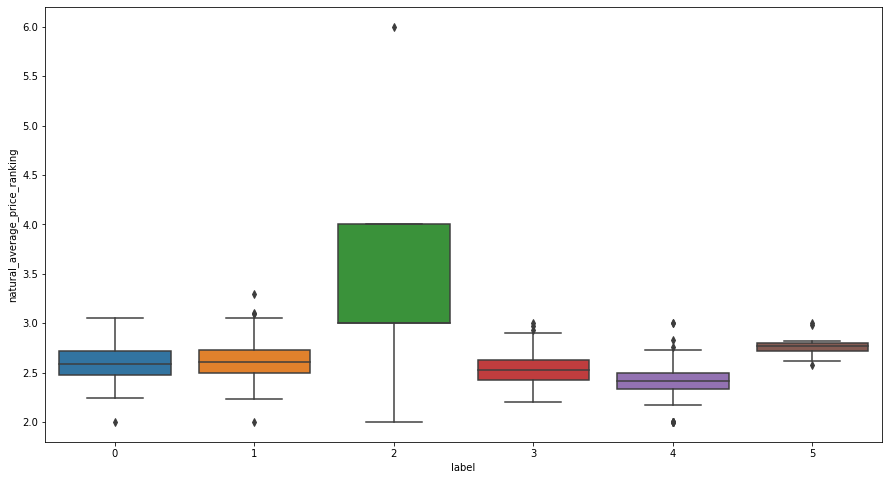

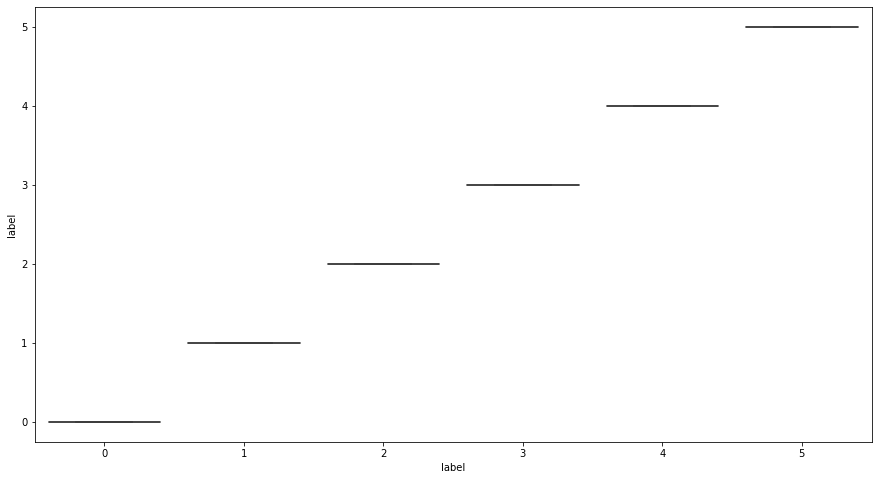

In [10]:
for c in u_df.columns:
    _, ax = plt.subplots(figsize=(15,8))
    sns.boxplot(x=LAB, y=c, data=u_df)